# Data Cleansing of the Data collected for the Best 250 Movies of All Times

## Calling the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Defining the Functions Used in the Data Cleansing

In [2]:
# The following function replaces a string by an integer if the string is purely numerical, and by NaN otherwise. 

def Clean_NaN(x):
    try:
        x=int(float(x))
    except:
        x=np.nan
    return x

In [3]:
# This function removes 'K' and 'M' from a string, and automatically moves the '.' to the right by the 
# correct number of places.

def RemoveDot (string):
    if string[-1]=='K':
        x=string.replace('K','')
        t='000'
    elif string[-1]=='M':
        x=string.replace('M','')
        t='000000'
    else:
        x='Not known!'
        t=''
    a=0; 
    b=x.find('.')
    if b !=-1: 
        while x[-1]=='0': 
                x=x.replace(x[-1],'')
        x=x+t
        for k in range(len(x)-b):
            if x[len(x)-k-1]=='0':
                a += 1
            else:
                break
        y=x.replace('.','')[:a+b] + '.' + x.replace('.','')[a+b:]
    else:
        y=x+t
    return y

In [4]:
# The following function takes the runtime in the format of x hours and y mintues, and replace it by total minutes.

def Convert_Runtime(x):
    if x=='Not available!':
        u=np.nan
    else:
        b1=x.find('h')
        try:
            y=int(x[:b1].strip())
        except:
            y=0
        b2=x.find('m')
        if b2!=-1:
            z=int(x[b1+1:b2].strip())
        else:
            z=0
        u=y*60+z
    return u

In [5]:
# The following function, takes the 'Box Office' of a movie in US dollars, and gives the equivalent amount in the 
# year 2020. To do the conversion, we have extracted a table (CPI index) from the website 
# https://www.usinflationcalculator.com/ and saved it as a txt file. The file is read by the code, and the 
# following function uses the content to do the conversion. 

def Box_Office_Conv(x,year):
    z=int(round(x*CPI[year-1920]))
    return z

In [6]:
# The 'Outlier_Elimination' function replaces the outliers of the list x by the bound. UpLow indicates whether 
# the given bound is an upper or a lower bound.

def Outlier_Elimination(x,bound,UpLow):
    if UpLow=='U':
        if x>bound:
            return bound
        else:
            return x
    elif UpLow=='L':
        if x<bound:
            return bound
        else:
            return x
    else: 
        print('It has not been specified properly whether the bound is a lower bound or an upper bound!')

## Calling the Data from Web-scraping 

In [7]:
# 'path' indicates where to find the file we obtained from webscraping, and 'path2' is the path for the txt file 
# we constructed from the website https://www.usinflationcalculator.com/ for CPI index. 

path='/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/Homework-02/250-Best-Movies.csv'
path2='/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/Homework-02/CPI-Conversion.txt'

In [8]:
# Reading the file and storing data in 'CPIIndex'.

with open(path2,'rt') as f:
    CPIIndex=f.readlines()

In [9]:
Year=[]
CPI=[]
for k in range(101):
    Year.append(int(CPIIndex[k].split(',')[0].strip()))
    CPI.append(float(CPIIndex[k].split(',')[1].strip())) 

In [10]:
# Reading the data (i.e. the result of webscraping that was stored as a csv file in 'path') in a dataframe.

df=pd.read_csv(path)

In [11]:
# For some reason when the dataframe is read, one new unewanted column is added. In here we just get rid of that
# column.

df.drop(columns=['Unnamed: 0'],inplace=True)

### Representing the Dataframe

The following dataframe has 250 rows (corresponding to the 250 Best Movies), and has 8 columns as follows:
1. Movie Name: that represents the name of the movie.
2. Movie Year: that represents the year movie was produced and screened.
3. Movie url: that represents the electronic address of the movie in the 'rottentomatoes.com' website.
4. Genre: that represents the genre of the movie.
5. Runtime: that represents the length of the movie.
6. Box Office: that represents the amount in US dollars the movie sold tickets in cinemas.
7. Critic Ratings: that represents the average ratings by the critics of the 'rottentomatoes.com' website.
8. Auidence Ratings: that represents the average ratings by all audience of the 'rottentomatoes.com' website.

In [12]:
df.shape

(250, 8)

In [13]:
df.head()

,Movie Name,Movie Year,Movie url,Genre,Runtime,Box Office,Critic Ratings,Audience Ratings
0,The Godfather,1972,http://www.rottentomatoes.com/m/12911,"drama,crime",2h 57m,134.8M,98,98
1,12 Angry Men,1957,http://www.rottentomatoes.com/m/18108,drama,1h 35m,Not available!,100,97
2,The Godfather: Part II,1974,http://www.rottentomatoes.com/m/12926,"drama,crime",3h 20m,Not available!,98,97
3,Seven Samurai,1954,http://www.rottentomatoes.com/m/16992,action,3h 28m,271.7K,100,97
4,Schindler's List,1993,http://www.rottentomatoes.com/m/12903,"history,drama",3h 15m,96.6M,97,97


## Cleansing the Dataframe

In [14]:
# We define a new dataframe 'New_df'. In the new dataframe, we get rid of the spaces in the name of the columns.

New_df=pd.DataFrame()
New_df['Movie_Name']=df['Movie Name']
New_df['Movie_url']=df['Movie url']
New_df['Genre']=df['Genre']
New_df['Movie_Year']=df['Movie Year'].apply(int)

In [15]:
# All columns of the old dataframe 'df' have string values. For the Box Office, we convert the value to integers
# through 'Clean_NaN' function first, and then we replace all the missing values by the mean of the values of 
# the column 'Box Office'.

New_df['Box_Office_(USD)']=df['Box Office'].apply(RemoveDot).apply(Clean_NaN)
New_df['Box_Office_(USD)'].fillna(value=int(round(New_df['Box_Office_(USD)'].mean())),inplace=True)
New_df['Box_Office_(USD)']=New_df['Box_Office_(USD)'].astype(int)

In [16]:
# In order to be able to compare the Box Office values, we need to convert all of values to their equivalent values
# in one year, say 2020. To do this, we take the advantage of the 'function Box_Office_Conv'.

New_df['Box_Office_(USD_2020)']=New_df.apply(
    lambda x: Box_Office_Conv(x['Box_Office_(USD)'],x['Movie_Year']), axis=1)

In [17]:
# We replace all the missing values in the column 'Crirtic_Ratings', and then substitute them by the mean of the 
# column. The values of the entries of the column are on integer type at the end of the day.

New_df['Critic_Ratings']=df['Critic Ratings'].apply(Clean_NaN)
New_df['Critic_Ratings'].fillna(value=round(New_df['Critic_Ratings'].mean()),inplace=True)

In [18]:
# Similarly, we replace all the missing values in the column 'Audience_Ratings', and then substitute them by 
# the mean of the column. The values of the entries of the column are on integer type at the end of the day.

New_df['Audience_Ratings']=df['Audience Ratings'].apply(Clean_NaN)
New_df['Audience_Ratings'].fillna(value=round(New_df['Audience_Ratings'].mean()),inplace=True)

In [19]:
# We convert the values of the column 'Runtime' to the minutes format. After the conversion, the values will have 
# integer type.

New_df['Runtime_(min)']=df['Runtime'].apply(Convert_Runtime)
New_df['Runtime_(min)'].fillna(value=round(New_df['Runtime_(min)'].mean()),inplace=True)

### Representing the new dataframe New_df

In [20]:
New_df.head()

,Movie_Name,Movie_url,Genre,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
0,The Godfather,http://www.rottentomatoes.com/m/12911,"drama,crime",1972,134800000,838456000,98.0,98.0,177.0
1,12 Angry Men,http://www.rottentomatoes.com/m/18108,drama,1957,57020001,527435009,100.0,97.0,95.0
2,The Godfather: Part II,http://www.rottentomatoes.com/m/12926,"drama,crime",1974,57020001,300495405,98.0,97.0,200.0
3,Seven Samurai,http://www.rottentomatoes.com/m/16992,action,1954,271700,2624622,100.0,97.0,208.0
4,Schindler's List,http://www.rottentomatoes.com/m/12903,"history,drama",1993,96600000,173880000,97.0,97.0,195.0


## Checking for Outliers

### Outliers of Box Office

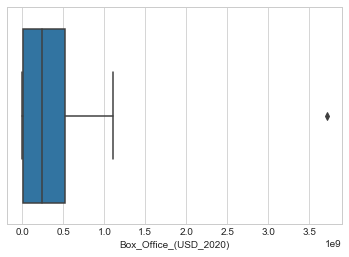

In [21]:
# The following is the box plot of the column Box Office. There seems to exist an outlier above the upper limit. 
# The outlier belongs to the movie 'Gone With the Wind'. We checked its boxplot against the value presented at 
# rottentomatoes.com, and we found that the box office value for this movie is indeed correct. So we will keep this
# in our analysis.

BoxPlot_Box_Office = sns.boxplot(New_df['Box_Office_(USD_2020)'])

In [22]:
New_df.loc[New_df['Box_Office_(USD_2020)']>3500000000]

,Movie_Name,Movie_url,Genre,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
127,Gone With the Wind,http://www.rottentomatoes.com/m/9818,"romance,history,drama",1939,198700000,3715690000,91.0,92.0,222.0


### Outliers of Runtime

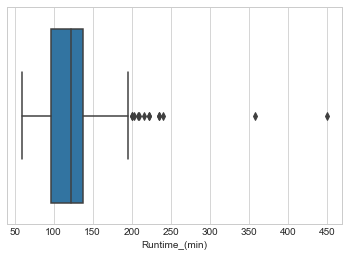

In [23]:
# Plotting the box plot of the Runtime column, we particularly see that there are two very lengthy movies. As we 
# in below, these two movies are 'The Best of Youth' and 'Satantango'. We checked the exact runtime of the two 
# movies, and we realized that we have the correct length of the movies in our dataframe. Therefore, we'll keep 
# them as they are.

BoxPlot_Runtime = sns.boxplot(New_df['Runtime_(min)'])

In [24]:
New_df.loc[New_df['Runtime_(min)']>300]

,Movie_Name,Movie_url,Genre,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
32,The Best of Youth,http://www.rottentomatoes.com/m/277029659,drama,2003,250400,353064,94.0,98.0,358.0
89,Satantango,http://www.rottentomatoes.com/m/359854872,"drama,comedy",1994,57020001,99785002,100.0,93.0,450.0


### Outliers of Critic Ratings

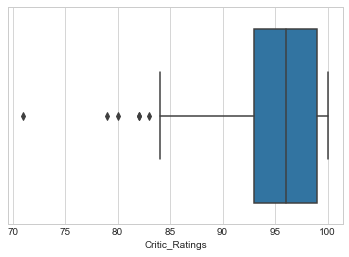

In [25]:
# It is observed that we have a couple of low outliers for the critic ratings. We do not have an independent way
# of checking the ratings. Therefore, we will replace the lower outliers by the lower fence of the box plot.

BoxPlot_CRatings = sns.boxplot(New_df['Critic_Ratings'])

In [26]:
New_df.loc[New_df['Critic_Ratings']<80]

,Movie_Name,Movie_url,Genre,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
142,Fight Club,http://www.rottentomatoes.com/m/13153,"mysteryandthriller,drama",1999,37000000,57720000,79.0,96.0,139.0
175,Forrest Gump,http://www.rottentomatoes.com/m/10036,"drama,comedy",1994,330300000,578025000,71.0,95.0,142.0


In [27]:
# We will substitute the lower outliers by the 'Outlier_Elimination' function we defined in HW-1.

LowerBound=84
New_df.Critic_Ratings = New_df.Critic_Ratings.apply(Outlier_Elimination,args=(LowerBound,'L',))

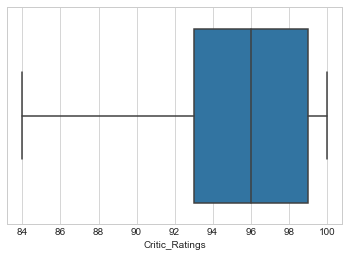

In [28]:
# The new box plot for Critic Ratings shows no outliers, as expected.

BoxPlot_CRatings = sns.boxplot(New_df.Critic_Ratings)

### Outliers of Audience Ratings

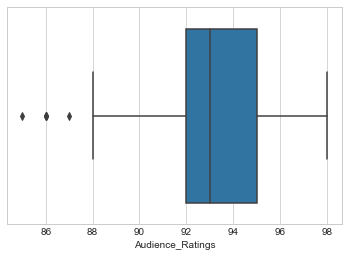

In [29]:
# It is observed that we have a couple of low outliers for the audience ratings. We do not have an independent way
# of checking the ratings. Therefore, we will replace the lower outliers by the lower fence of the box plot.

BoxPlot_ARatings = sns.boxplot(New_df['Audience_Ratings'])

In [30]:
New_df.loc[New_df['Audience_Ratings']<86]

,Movie_Name,Movie_url,Genre,Movie_Year,Box_Office_(USD),Box_Office_(USD_2020),Critic_Ratings,Audience_Ratings,Runtime_(min)
138,The Matrix,http://www.rottentomatoes.com/m/12897,"action,scifi",1999,171400000,267384000,88.0,85.0,136.0


In [31]:
# We will substitute the lower outliers by the 'Outlier_Elimination' function we defined in HW-1.

LowerBound=88
New_df.Audience_Ratings = New_df.Audience_Ratings.apply(Outlier_Elimination,args=(LowerBound,'L',))

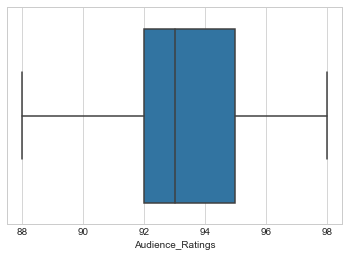

In [32]:
# The new box plot for Audience Ratings shows no outliers, as expected.

BoxPlot_ARatings = sns.boxplot(New_df['Audience_Ratings'])

## Saving the Cleansed Dataframe in a csv File

In [33]:
# We save the cleansed dataframe to a newly defined dataframe 'New_df' as a csv file for the next step of the 
# process (i.e. Data Analysis)

New_df.to_csv('Cleansed_Data.csv')